# Data Visualization with Python
In today’s world, a lot of data is being generated on a daily basis. And sometimes to analyze this data for certain trends, patterns may become difficult if the data is in its raw format. To overcome this data visualization comes into play. Data visualization provides a good, organized pictorial representation of the data which makes it easier to understand, observe, analyze. In this tutorial, we will discuss how to visualize data using Python.

Python provides various libraries that come with different features for visualizing data. All these libraries come with different features and can support various types of graphs. In this tutorial, we will be discussing four such libraries.

- Matplotlib

- Seaborn


We will discuss these libraries one by one and will plot some most commonly used graphs. 

## Database Used

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
 
# reading the database
tips = pd.read_csv("tips.csv")
 
# printing the top 10 rows
display(tips.head(10))

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


### Basic Filtering with pandas

### **Example 1**: Filter the data for smokers vs. non-smokers

In [109]:
#This is another DataFrame from the Panda library that holds the values of only people who smoke who have tipped
smoker_tips = tips[tips['smoker'] == 'Yes']
#This is another DataFrame from the Panda library that holds the values of only people who smoke who haven't tipped. Stored in non_smoker_tips DataFrame
non_smoker_tips = tips[tips['smoker'] == 'No']

#Just checking data for accuracy.
#display(non_smoker_tips.head(10))
#display(smoker_tips.head(10))

print("\nNumber of tips for smokers:", len(smoker_tips))
print("Number of tips for non-smokers:", len(non_smoker_tips))

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


,total_bill,tip,sex,smoker,day,time,size
56,38.01,3.00,Male,Yes,Sat,Dinner,4
58,11.24,1.76,Male,Yes,Sat,Dinner,2
60,20.29,3.21,Male,Yes,Sat,Dinner,2
61,13.81,2.00,Male,Yes,Sat,Dinner,2
62,11.02,1.98,Male,Yes,Sat,Dinner,2
63,18.29,3.76,Male,Yes,Sat,Dinner,4
67,3.07,1.00,Female,Yes,Sat,Dinner,1
69,15.01,2.09,Male,Yes,Sat,Dinner,2
72,26.86,3.14,Female,Yes,Sat,Dinner,2
73,25.28,5.00,Female,Yes,Sat,Dinner,2



Number of tips for smokers: 93
Number of tips for non-smokers: 151


### **Example 2**: Group by day and smoker status to calculate average tip

In [87]:
# Example 2: Group by day and smoker status to calculate average tip
avg_tip_by_day = tips.groupby(['day', 'smoker'])['tip'].mean().unstack()
print("\nAverage tip by day and smoker status:")
print(avg_tip_by_day)



Average tip by day and smoker status:
smoker        No       Yes
day                       
Fri     2.812500  2.714000
Sat     3.102889  2.875476
Sun     3.167895  3.516842
Thur    2.673778  3.030000


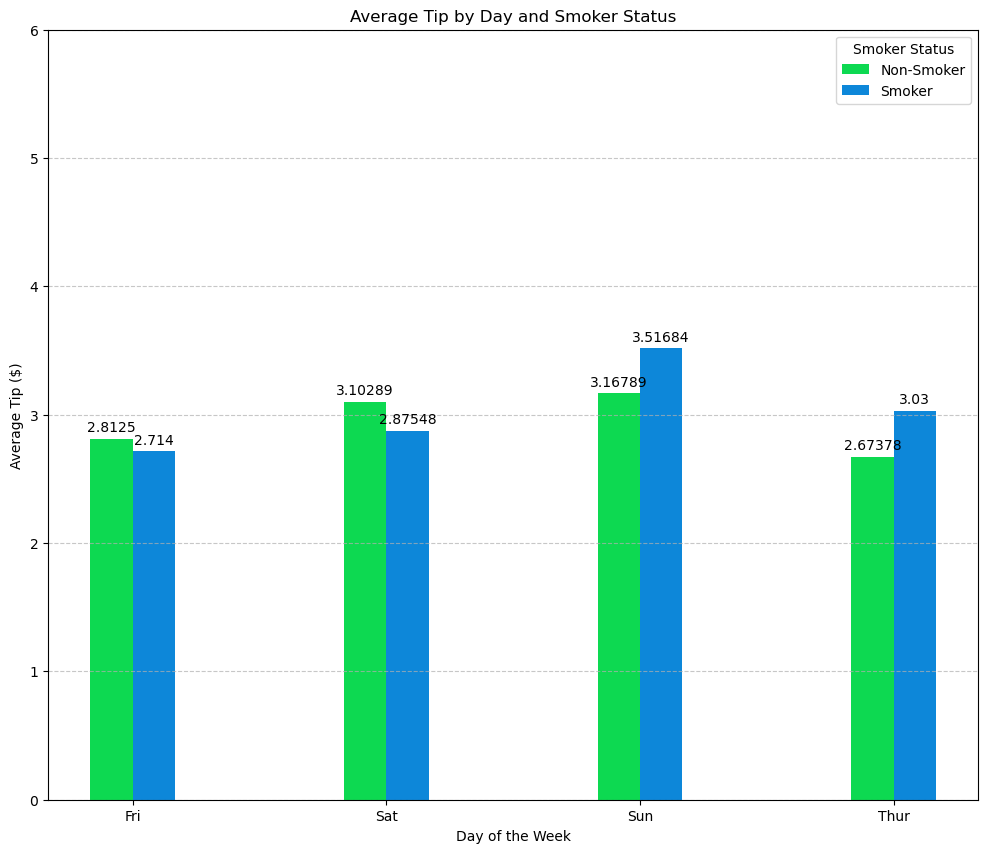

In [95]:
# ---------------------------
# Visualizing the Results
# ---------------------------

# Visualization 1: Bar Plot of Average Tip by Day for Smokers vs. Non-Smokers
plt.figure(figsize=(12,10))
days =  avg_tip_by_day.index
# Label Locations (Smoker, Non-Smoker) spread a bit more with a 1.5 multiplier
labelLocations = np.arange(len(days)) * 1.5
width = 0.25
#Loop to create the bars with if/else statement to determine smoker status and assign a color.
for i, smoker_or_not in enumerate(['No', 'Yes']):
    offset = width * i
    bars = plt.bar(labelLocations + offset, avg_tip_by_day[smoker_or_not], width, 
                   label = 'Non-Smoker' if smoker_or_not == 'No' else 'Smoker',
                  color = '#0D87D9' if smoker_or_not == 'Yes' else '#0DD951')
    plt.bar_label(bars, padding=3)

#Some customization settings for the 
plt.xlabel('Day of the Week')
plt.ylabel('Average Tip ($)')
plt.title('Average Tip by Day and Smoker Status')
plt.xticks(labelLocations + width/2, days)
plt.legend(title='Smoker Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0,6)
plt.show()

### Simple select

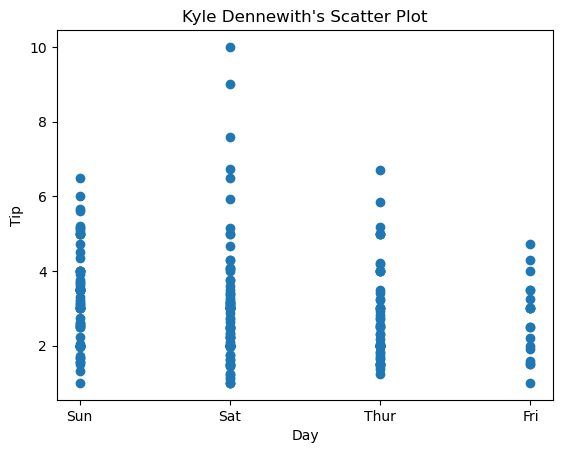

In [6]:
# Scatter plot with day against tip
plt.scatter(tips['day'], tips['tip'])
 
# Adding Title to the Plot
plt.title("Kyle Dennewith's Scatter Plot")
 
# Setting the X and Y labels
plt.xlabel('Days')
plt.ylabel('Tips')
 
plt.show()

### **Example 3**: Filter the data for a specific day (e.g., "Sun")


Number of tips on Sunday: 76


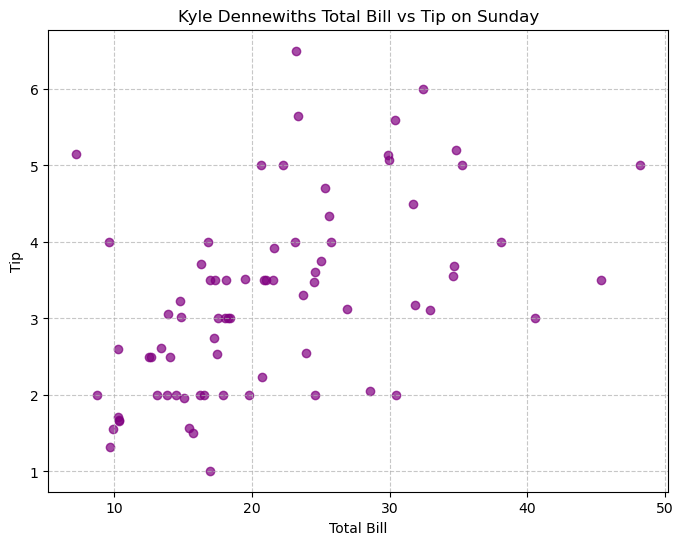

In [103]:
# Example 3: Filter the data for a specific day (e.g., "Sun")

#If the tips day is associated with Sunday then that value will be added to the DataFrame sunday_tips
sunday_tips = tips[tips['day'] == 'Sun']
print("\nNumber of tips on Sunday:", len(sunday_tips))

# Visualization 2: Scatter Plot for Total Bill vs. Tip on Sunday
plt.figure(figsize=(8,6))
plt.scatter(sunday_tips['total_bill'], sunday_tips['tip'], color='purple', alpha=0.7)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Kyle Dennewiths Total Bill vs Tip on Sunday')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



### Example 3: If the 'time' column exists, filter for Lunch time and visualize


Number of tips during Lunch time: 68


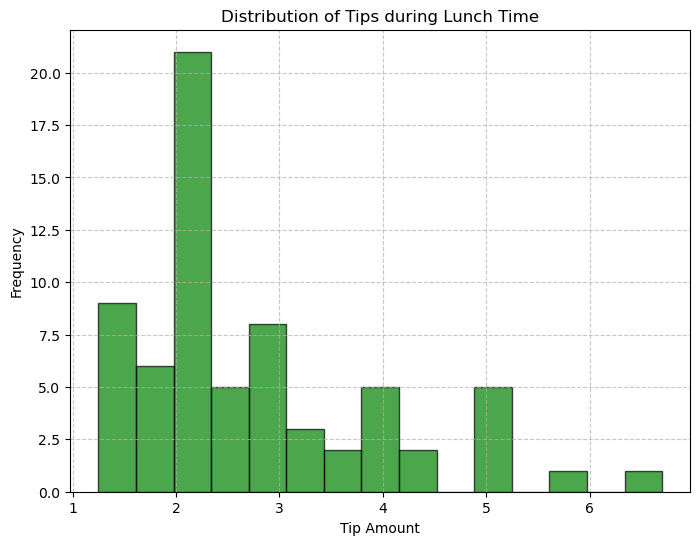

In [105]:
# Example 4: 
if 'time' in tips.columns:
    lunch_tips = tips[tips['time'] == 'Lunch']
    print("\nNumber of tips during Lunch time:", len(lunch_tips))
    
    # Visualization 3: Histogram of Tips during Lunch
    plt.figure(figsize=(8,6))
    plt.hist(lunch_tips['tip'], bins=15, color='green', edgecolor='black', alpha=0.7)
    plt.xlabel('Tip Amount')
    plt.ylabel('Frequency')
    plt.title('Distribution of Tips during Lunch Time')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
else:
    print("\nThe 'time' column is not present in the dataset.")